<a href="https://colab.research.google.com/github/BazaiHassan/tesnorflow-DeepLearning/blob/main/tf_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [9]:
# Generate train and test data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [15]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

len(class_names)

10

Text(0.5, 1.0, 'The lable is Zero')

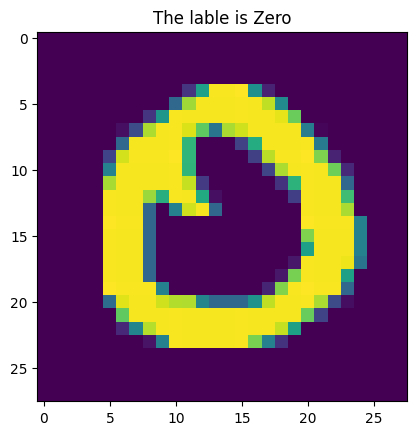

In [18]:
# Visual a random sample
import matplotlib.pyplot as plt
import random

random_sample = random.randint(0, len(train_data))
plt.imshow(train_data[random_sample])
plt.title(f"The lable is {class_names[train_labels[random_sample]]}")

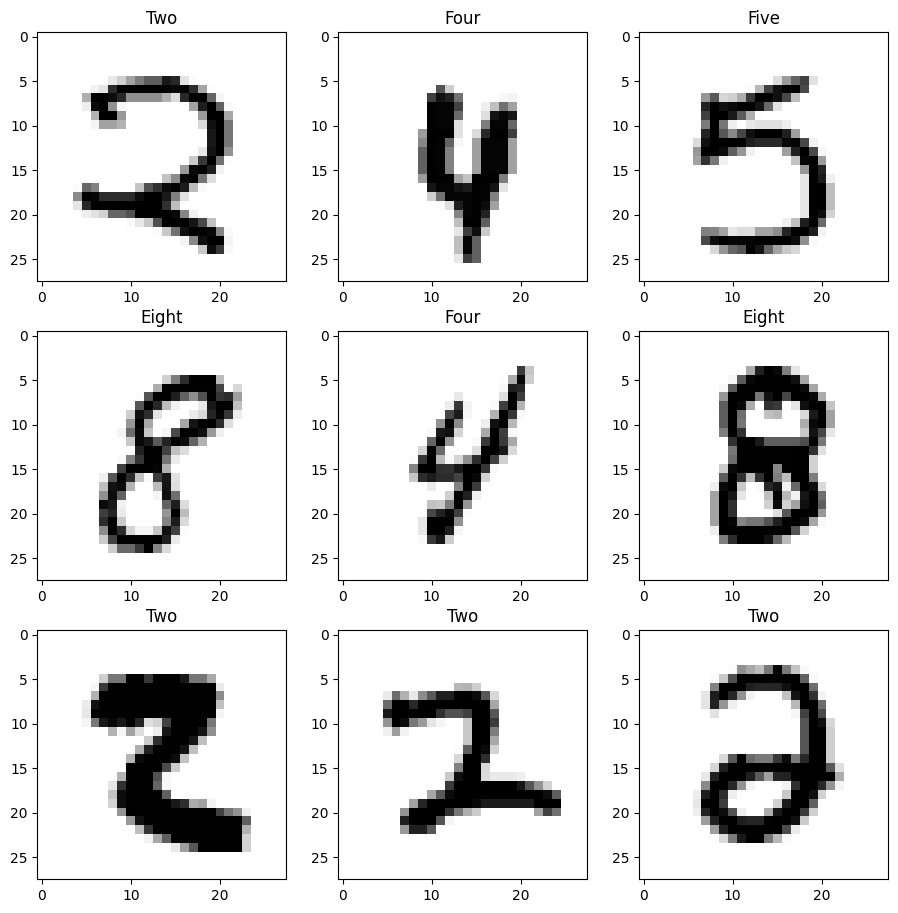

In [21]:
# Plot multiple random examples of the dataset
import random
plt.figure(figsize=(11,11))
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  rand_index = random.randint(0, len(train_data))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  # plt.axis(False)

In [23]:
# Create a deep NN model to predict the input number
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

In [25]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [26]:
# Normalize
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

In [27]:
history_model = model.fit(
    train_data_norm,
    train_labels,
    epochs=30,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3885 - accuracy: 0.5417 - val_loss: 0.9646 - val_accuracy: 0.7080
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8598 - accuracy: 0.7357 - val_loss: 0.7892 - val_accuracy: 0.7591
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7423 - accuracy: 0.7735 - val_loss: 0.7063 - val_accuracy: 0.7890
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6708 - accuracy: 0.8006 - val_loss: 0.6470 - val_accuracy: 0.8086
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6298 - accuracy: 0.8150 - val_loss: 0.6137 - val_accuracy: 0.8271
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6058 - accuracy: 0.8243 - val_loss: 0.6075 - val_accuracy: 0.8199
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5861 - accuracy: 0.8283 - val_loss: 0.5795 - val_accuracy:

<Axes: title={'center': 'Visulize the model results'}>

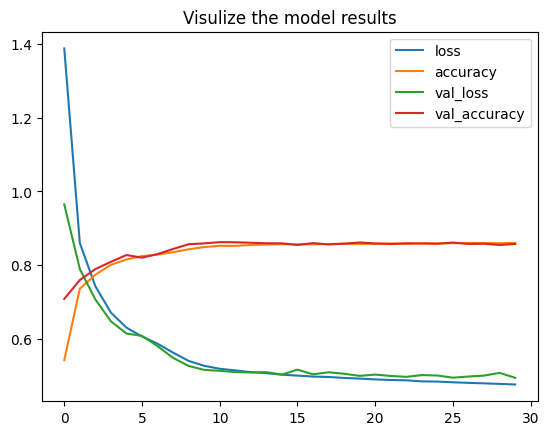

In [29]:
import pandas as pd

pd.DataFrame(history_model.history).plot(title="Visulize the model results")


In [30]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [31]:
# Make some predictions
y_probs = model.predict(test_data_norm) # Prediction probabilities

# Convert y_probs to integer to generate our confusion matrix plot
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


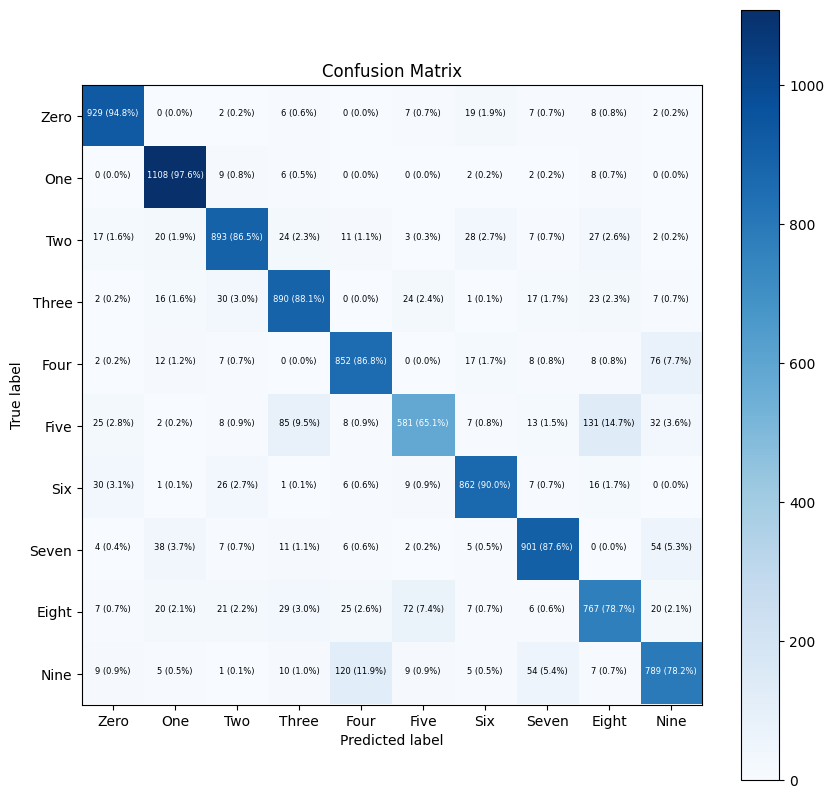

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
confusion_matrix(y_true=test_labels, y_pred=y_preds)

make_confusion_matrix(
    y_true = test_labels,
    y_pred = y_preds,
    classes = class_names,
    figsize=(10,10),
    text_size=6
)

### Let's try a new model with deeper layers

In [35]:
# Create a deep NN model to predict the input number
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(16, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Normalize
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

history_model = model.fit(
    train_data_norm,
    train_labels,
    epochs=30,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3796 - accuracy: 0.8942 - val_loss: 0.2328 - val_accuracy: 0.9328
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1942 - accuracy: 0.9444 - val_loss: 0.1661 - val_accuracy: 0.9508
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1558 - accuracy: 0.9548 - val_loss: 0.1479 - val_accuracy: 0.9576
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1310 - accuracy: 0.9620 - val_loss: 0.1294 - val_accuracy: 0.9615
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1140 - accuracy: 0.9669 - val_loss: 0.1252 - val_accuracy: 0.9638
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1028 - accuracy: 0.9694 - val_loss: 0.1304 - val_accuracy: 0.9616
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0924 - accuracy: 0.9721 - val_loss: 0.1176 - val_accuracy:

In [36]:
# Make some predictions
y_probs = model.predict(test_data_norm) # Prediction probabilities

# Convert y_probs to integer to generate our confusion matrix plot
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


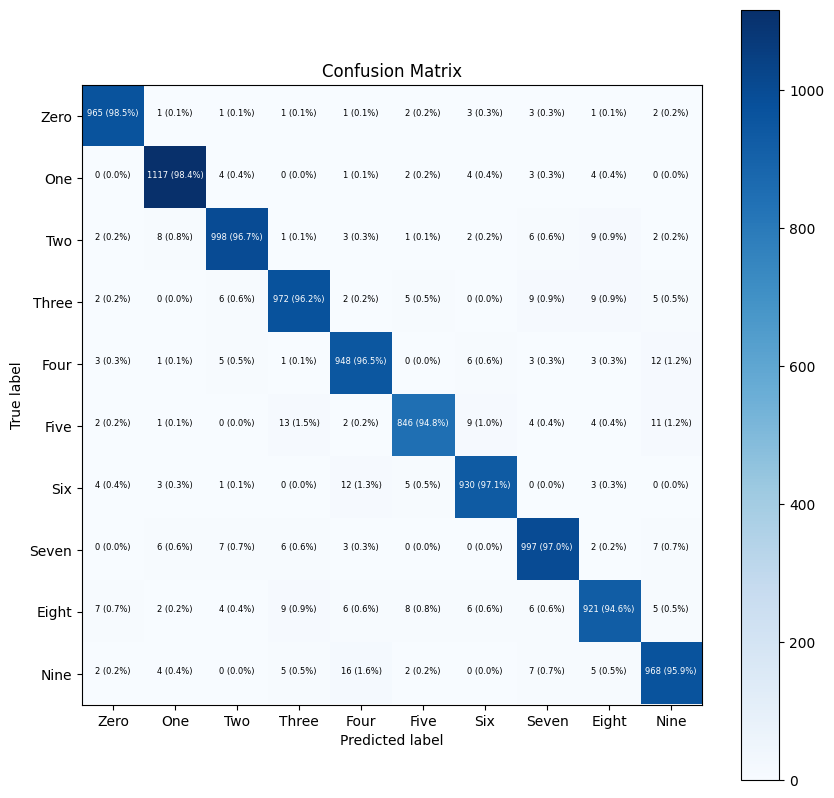

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np
confusion_matrix(y_true=test_labels, y_pred=y_preds)

make_confusion_matrix(
    y_true = test_labels,
    y_pred = y_preds,
    classes = class_names,
    figsize=(10,10),
    text_size=6
)

In [38]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 20ms/step


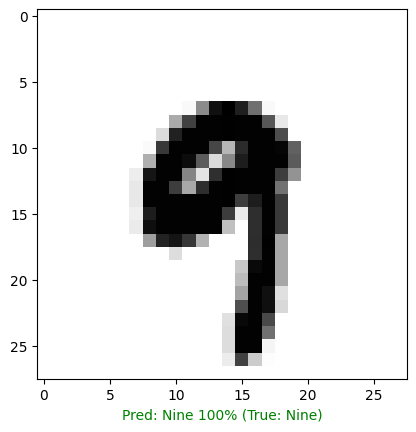

In [41]:
# Check out a random image as well as its prediction
plot_random_image(model=model,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)